<a href="https://colab.research.google.com/github/selvam1978/TNSDC-GENAI/blob/main/hand%20written%20digit%20regonition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
938/938 [==============================] - 63s 63ms/step - loss: 0.1714 - accuracy: 0.9478 - val_loss: 0.0535 - val_accuracy: 0.9819
Epoch 2/5
938/938 [==============================] - 47s 51ms/step - loss: 0.0511 - accuracy: 0.9839 - val_loss: 0.0364 - val_accuracy: 0.9896
Epoch 3/5
938/938 [==============================] - 46s 49ms/step - loss: 0.0361 - accuracy: 0.9884 - val_loss: 0.0327 - val_accuracy: 0.9885
Epoch 4/5
938/938 [==============================] - 47s 50ms/step - loss: 0.0265 - accuracy: 0.9917 - val_loss: 0.0304 - val_accuracy: 0.9892
Epoch 5/5
313/313 [==============================] - 3s 8ms/step - loss: 0.0275 - accuracy: 0.9908
Test accuracy: 0.9908000230789185


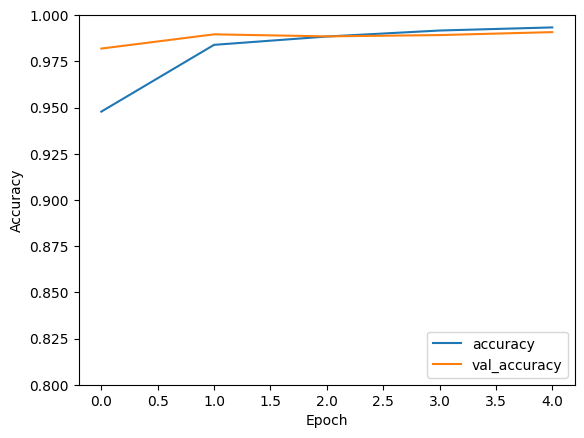

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Create the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')
plt.show()
